# Regularization

## Ridge Regression: Bias-Variance Tradeoff, Regularization, and Lambda Selection

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate full dataset (ground truth relationship)
X_full = np.linspace(0, 2, 100).reshape(-1, 1)  # Feature
y_full = 4 + 3 * X_full + np.random.randn(100, 1) * 1.2  # Smaller noise for realism

# Sample only a few points (to force overfitting)
X_train_idx = np.random.choice(len(X_full), 5, replace=False)  # Pick 5 random training points
X_train = X_full[X_train_idx]
y_train = y_full[X_train_idx]

# Remaining points are test data
X_test = np.delete(X_full, X_train_idx).reshape(-1, 1)
y_test = np.delete(y_full, X_train_idx).reshape(-1, 1)

In [3]:
# Lower-degree polynomial regression to fix overfitting
# ---------------------------------------------------------
# Instead of using a very high-degree polynomial, we use degree=3 to balance flexibility and avoid extreme overfitting.
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X_train, y_train)  # Train the polynomial regression model using the small training dataset

# Simple mean model to demonstrate underfitting
# ---------------------------------------------------------
# The model simply predicts the average target value for all inputs.
# This represents an extreme case of underfitting, where the model is too simple to capture any trend.
y_mean = np.full_like(y_full, np.mean(y_train))  # Predicts the same mean value for all X values


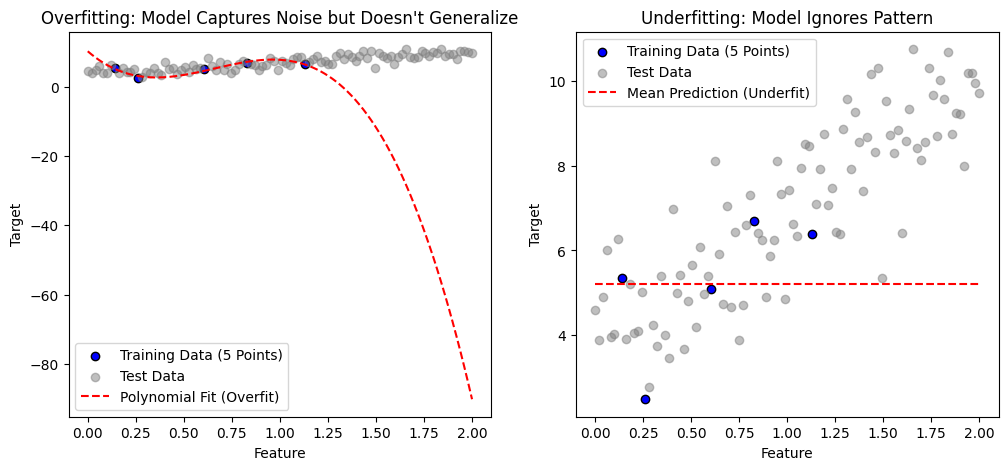

In [4]:
# Plot Overfitting vs. Underfitting
plt.figure(figsize=(12, 5))

# Overfitting: Lower-degree polynomial to fit training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color="blue", label="Training Data (5 Points)", edgecolor="black")
plt.scatter(X_test, y_test, color="gray", alpha=0.5, label="Test Data")
plt.plot(X_full, poly_model.predict(X_full), color="red", linestyle="dashed", label="Polynomial Fit (Overfit)")
plt.title("Overfitting: Model Captures Noise but Doesn't Generalize")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

# Underfitting: Predicting a single mean value
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color="blue", label="Training Data (5 Points)", edgecolor="black")
plt.scatter(X_test, y_test, color="gray", alpha=0.5, label="Test Data")
plt.plot(X_full, y_mean, color="red", linestyle="dashed", label="Mean Prediction (Underfit)")
plt.title("Underfitting: Model Ignores Pattern")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

plt.show()

High Variance vs. High Bias in Linear Regression

What this does:
- High variance data: A model that overfits noisy training data.
- High bias data: A model that underfits, failing to capture patterns.
- Fits a high-degree polynomial regression (overfitting) and a mean-based model (underfitting).
- Produces two side-by-side scatter plots.

Interpreting the Output:

**Left plot (High Variance, Overfitting):**
What's happening?
- The red dashed polynomial regression line follows the training points exactly.
- The model deviates wildly from the test data, especially at larger x-values.
- The curve drops off at the end, making unreliable predictions for unseen data.
- If we used a different sample of training data, the model would change dramatically, showing high variance.

Key takeaway:
- This model has low bias but high variance.
- It memorizes the training data (including noise) instead of learning a general trend.
- Overfitting happens when a model is too flexible and captures noise instead of patterns.
- Extrapolation fails because the model was trained on too few points and assumes drastic changes.

**Right plot (High Bias, Underfitting):**
What's happening?
- The red dashed line is nearly flat, meaning the model just predicts the average of the training data.
- The model ignores the relationship between x and y.
- Even if we added more data, the model would still fail because it is too simple.

Key takeaway:
- This model has high bias but low variance.
- It underfits because it's too simple, ignoring the pattern in the data.
- Underfitting happens when a model lacks flexibility and cannot adapt to the underlying trend.

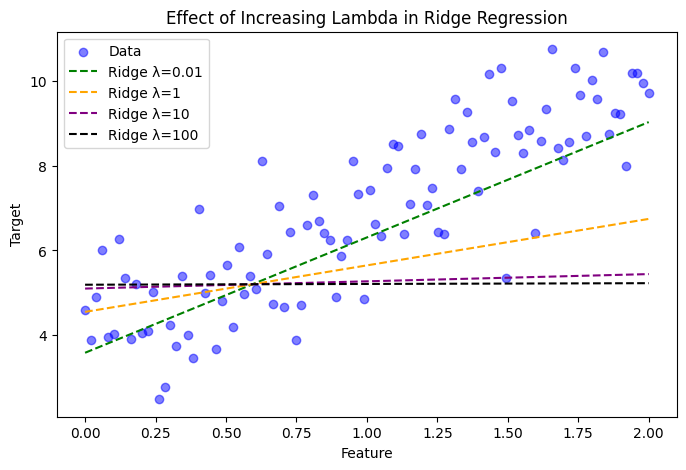

In [5]:
# Effect of Lambda in Ridge Regression (Coefficient Shrinkage)
# ---------------------------------------------------------
# We train multiple Ridge regression models with different levels of regularization (lambda values)
lambdas = [0.01, 1, 10, 100]  # Different lambda values to test regularization impact

plt.figure(figsize=(8, 5))  # Create a new figure with appropriate size
plt.scatter(X_full, y_full, color="blue", alpha=0.5, label="Data")  # Plot the original data points

# Train Ridge models with increasing lambda values
colors = ["green", "orange", "purple", "black"]  # Different colors for different lambda values
for i, l in enumerate(lambdas):
    ridge = Ridge(alpha=l)  # Initialize Ridge Regression with specific lambda
    ridge.fit(X_train, y_train)  # Train Ridge on the training data
    plt.plot(X_full, ridge.predict(X_full), color=colors[i], linestyle="dashed", label=f"Ridge λ={l}")
    # Plot the Ridge regression predictions across the full dataset

plt.title("Effect of Increasing Lambda in Ridge Regression")  # Add title
plt.xlabel("Feature")  # X-axis label
plt.ylabel("Target")  # Y-axis label
plt.legend()  # Show legend to distinguish different lambda values
plt.show()  # Display the plot

Effect of Lambda in Ridge Regression (Coefficient Shrinkage)

What this does:
- Trains four Ridge regression models with increasing \lambda values.
- Visualizes how regularization affects predictions.
- Produces a scatter plot with multiple regression lines.

Interpreting the Output:
- The blue points represent the training data.
- Green dashed line ($\lambda$ = 0.01):
- The model is very close to OLS, meaning almost no regularization.
- The line closely fits the training data, which could lead to overfitting.
- Orange dashed line ($\lambda$ = 1):
- The model still follows the general trend but starts smoothing out extreme values.
- This is often a good balance between bias and variance.
- Purple dashed line ($\lambda$ = 10):
- The line becomes much less flexible, smoothing out fluctuations.
- The model starts biasing toward zero coefficients.
- Black dashed line ($\lambda$ = 100):
- The line is nearly flat, meaning all coefficients are close to zero.
- The model is too simple, meaning it is underfitting.

**Key takeaway:**
- Small $\lambda$ → Similar to OLS, risk of overfitting.
- Moderate $\lambda$ → Balanced generalization, prevents overfitting while capturing meaningful patterns.
- Large $\lambda$ → Model is too rigid, underfitting the data.

### Introduction to Cross-Validation

In machine learning, we need a way to evaluate how well our model generalizes to unseen data. A common mistake is to train a model on one dataset and evaluate it on the same data, which can lead to overfitting—the model performs well on training data but fails on new data.

Cross-validation (CV) is a technique that helps solve this by splitting the dataset into multiple training and validation sets. Instead of evaluating the model on the same data it was trained on, we train the model on different subsets and test it on unseen data.

How Cross-Validation Works (k-Fold CV)
	1.	Split the dataset into  k  equal parts (or “folds”).
	2.	Train the model  k  times, each time using a different  k-1  folds for training and the remaining fold for validation.
	3.	Compute the average performance over all  k  folds to estimate how well the model generalizes.

For example, in 5-fold cross-validation:
- The data is split into 5 parts.
- The model trains on 4 parts and tests on the remaining 1 part.
- This process repeats 5 times, with each part taking a turn as the test set.
- The final model evaluation is the average error across all 5 folds.

Why Use Cross-Validation?

- Reduces overfitting risk by testing the model on unseen data multiple times.
- More reliable model evaluation compared to a single train-test split.
- Ensures model performs consistently across different subsets of data.

In this notebook, we will use 5-fold cross-validation to select the best regularization strength ($\lambda$) for Ridge Regression. Instead of manually choosing $\lambda$, we will find the value that minimizes Mean Squared Error (MSE) across multiple folds.


In [6]:
# Use Cross-Validation to Find the Optimal Lambda (Hyperparameter Tuning)
# ---------------------------------------------------------
ridge_cv_scores = []  # List to store cross-validation MSE scores
lambda_values = np.logspace(-3, 3, 50)  # Generate 50 lambda values ranging from 10^-3 to 10^3 (log scale)

# Loop through different lambda values and perform cross-validation
for l in lambda_values:
    ridge = Ridge(alpha=l)  # Initialize Ridge model with current lambda value
    scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    # Perform 5-fold cross-validation to compute MSE
    # Since MSE is a “lower is better” metric, sklearn makes it negative so that
    # higher (less negative) values indicate better performance
    ridge_cv_scores.append(np.mean(scores))  # Store the mean cross-validation score for this lambda

# Convert negative MSE scores to positive values for easier interpretation
ridge_cv_scores = np.abs(ridge_cv_scores)

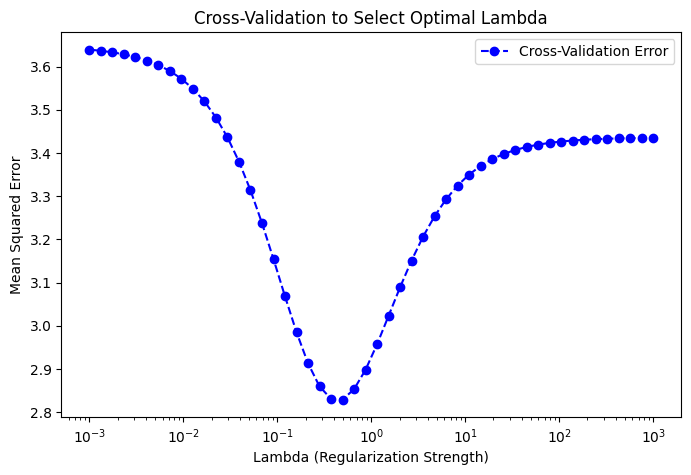

In [7]:
# Plot the cross-validation error curve
plt.figure(figsize=(8, 5))
plt.plot(lambda_values, ridge_cv_scores, marker="o", linestyle="dashed", color="blue", label="Cross-Validation Error")
plt.xscale("log")  # Log-scale for better visualization
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.title("Cross-Validation to Select Optimal Lambda")
plt.legend()
plt.show()

Choosing Lambda Using Cross-Validation

What this does:
- Uses cross-validation to find the best $\lambda$ value.
- Computes Mean Squared Error (MSE) for different Ridge models.
- Produces a plot showing MSE vs. $\lambda$.

Interpreting the Output:
- X-axis: Different values of $\lambda$ (log scale).
- Y-axis: Mean Squared Error (MSE) from cross-validation.

What to look for:
- The best $\lambda$ value is the one where MSE is minimized.
- Left side (small $\lambda$):
- Ridge is very close to OLS.
- The error is high due to overfitting.
- Middle (optimal $\lambda$):
- This is the sweet spot where Ridge balances bias and variance.
- The error is lowest, meaning the model generalizes well.
- Right side (large $\lambda$):
- The error starts increasing again due to underfitting.
- Ridge shrinks coefficients too much, making the model too simple.

**Key takeaway:**
- Cross-validation identifies the $\lambda$ that provides the best generalization.
- **Small $\lambda$ → Overfitting** (model memorizes noise, high variance).
- **Large $\lambda$ → Underfitting** (model oversimplifies, high bias).
- **Optimal $\lambda$ minimizes validation error, balancing bias and variance.**